# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


Oh no, look at that doubled index there called 'Unnamed: 0'!

In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
heroes_df.rename(str.lower, axis='columns', inplace=True)
powers_df.rename(str.lower, axis='columns', inplace=True)

In [7]:
heroes_df.head(6)

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0


In [8]:
powers_df.head(6)

,hero_names,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [9]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
gender        734 non-null object
eye color     734 non-null object
race          734 non-null object
hair color    734 non-null object
height        734 non-null float64
publisher     719 non-null object
skin color    734 non-null object
alignment     734 non-null object
weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [10]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with duplicate values

In [11]:
# would be better to sort by most values and drop entries with least values
heroes_df.drop_duplicates(keep='last', subset=['name', 'publisher', 'gender'], inplace=True)

In [12]:
heroes_df[heroes_df.duplicated(keep=False, subset=['name', 'publisher', 'gender'])]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
I used a couple different strategies to handle the missing data in the dataset.

For the NaN values that were in the publisher column, I investigated and could not see any relationship between the other variables and the publisher. Instead of filling in the publisher fields, I decided losing 15 rows was not bad compared to having a 50% chance of guessing the right publisher (half all heroes are published by Marvel).

For the -99.0 values, which were in the height and weight categories, I filled them in with the central tendency. 

For weight, this meant seperating the heroes by gender, and then finding the median. I checked the mean first, but distribution was skewed big time so the mean was not a good indicator. I settled on the median.



### Values that need to be dealt with:
- NaN values
- -99.0 values
- '-' values

### NaN Values

Find isna for each df:

In [13]:
heroes_df.isna().sum().sort_values(ascending=False).head()

publisher     15
weight         2
alignment      0
skin color     0
height         0
dtype: int64

There are 15 missing from the publisher column, and 2 missing from weight.

### Dealing with publisher missing values

Check and see which publishers are most popular. 
I could assign the most popular publisher to the 15 missing publisher values.

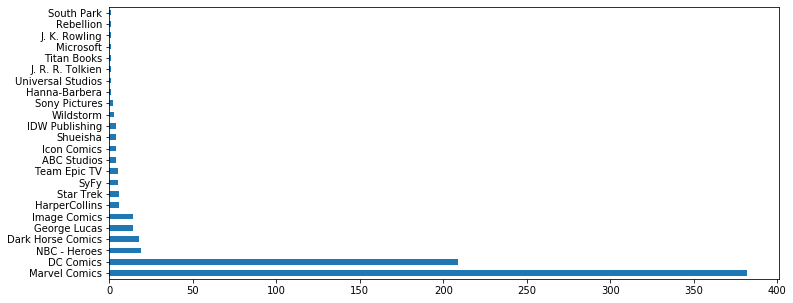

In [14]:
heroes_df['publisher'].value_counts().plot.barh(figsize=(12, 5));

So, Marvel comics looks like the most popular publisher, with DC comin in second.
What are the exact percentages?
Lets check real quick:

In [15]:
heroes_df['publisher'].value_counts(normalize=True).head()

Marvel Comics        0.540311
DC Comics            0.295615
NBC - Heroes         0.026874
Dark Horse Comics    0.025460
George Lucas         0.019802
Name: publisher, dtype: float64

So, Marvel comes in first, having published about 54% of all super heroes. 

DC Comics is second with 30%.

Let's check out the rows that have missing publisher information and see if we can spot anything that might give us an idea on how to deal with the missing values.

In [16]:
heroes_df[heroes_df['publisher'].isna()]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


The heroes are from different sources, a lot of them are from books, movies, tv shows, commercials, kind of all over the place.

A lot of these heroes are missing a lot of data, so at this point I'm feeling okay with dropping these heroes.

If there was more pressure to interpolate the missing values, I would search for some resources or an API that I could use to fetch the missing data. In this case though I will drop the 15 rows.

In [17]:
heroes_df = heroes_df.dropna(subset=['publisher'])

### Dealing with the missing weight values
In order to deal with the missing weight values, we're going to need to make sure there are no missing gender values, since we will be using the gender to fill in the weight and height.

In [18]:
heroes_df['gender'].value_counts()

Male      484
Female    196
-          27
Name: gender, dtype: int64

27 missing gender values. Lets check them out.

In [19]:
heroes_df[heroes_df['gender'] == '-']

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
87,Bird-Brain,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
112,Blaquesmith,-,black,-,No Hair,-99.0,Marvel Comics,-,good,-99.0
133,Box III,-,blue,-,Blond,193.0,Marvel Comics,-,good,110.0
134,Box IV,-,brown,-,Brown / Black,-99.0,Marvel Comics,-,good,-99.0
160,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0
165,Cecilia Reyes,-,brown,-,Brown,170.0,Marvel Comics,-,good,62.0
178,Clea,-,-,-,White,-99.0,Marvel Comics,-,good,-99.0
196,Cypher,-,blue,-,Blond,175.0,Marvel Comics,-,good,68.0
234,Ego,-,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
249,Fabian Cortez,-,blue,-,Brown,196.0,Marvel Comics,-,bad,96.0


I don't know what to do here. Just by looking at the names I know most of them are men, and a few of them are women. There is not way to tell looking at the rest of the data though, and hardcoding them one by one seems to only be a solution that would work on small datasets with familiar names.

I know I shouldn't drop anthing else, but I'm going to go ahead and change them to male for now. The very few females that are mislabeled will not change anything too much (I hope)

In [20]:
heroes_df['gender'].replace(to_replace='-', value='Male', inplace=True)

In [21]:
heroes_df[heroes_df['gender'] == '-']

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight


Well we took care of the missing gender values. Lets move on and tackle the weight.

In [22]:
heroes_df.loc[(heroes_df['height'] == -99.0), :]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
711,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
712,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
713,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0


Seems like a substantial amount of missing values.

Weight is usually distributed pretty evenly right? 

What if we check the mean, median, and standard deviation for both male and female super heros?

In [23]:
heroes_df.groupby('gender')['weight'].agg(['mean', 'median', 'std'])

,mean,median,std
gender,,,
Female,29.040816,54.0,103.489072
Male,54.434442,79.0,139.508181


Lets try again without the -99 values changing our distribution

In [24]:
weight_df = heroes_df[heroes_df['weight'] != -99.0]
weight_df.groupby('gender')['weight'].agg(['mean', 'median', 'std'])

,mean,median,std
gender,,,
Female,78.985816,58.0,77.230082
Male,126.301724,90.0,111.204271


In [25]:
weight_df[weight_df['gender'] == 'Female']['weight'].median()

58.0

Wow that changed the mean a lot. The median also went up a small amount. Lets try to histogram it.

### Distribution for female weights

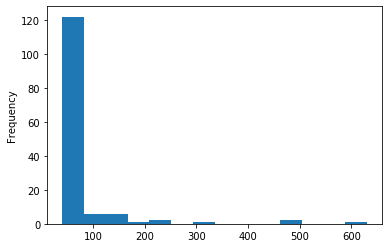

In [26]:
weight_df[weight_df['gender'] == 'Female']['weight'].plot.hist(bins=14);

### Distribution for male weights

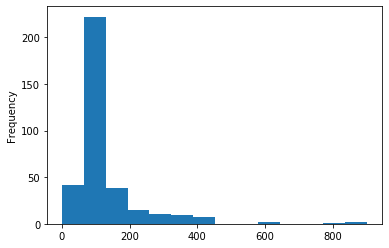

In [27]:
weight_df[weight_df['gender'] == 'Male']['weight'].plot.hist(bins=14);

It looks like the best bet with all these outliers, will be to use the median. 
The mean is very skewed because of the very large values of the few outliers.

In [28]:
# set missing female heights to median
med_female_weight = weight_df[weight_df['gender'] == 'Female']['weight'].median()
heroes_df.loc[(heroes_df['gender'] == 'Female') & (heroes_df['weight'] == -99.0), 'weight'] = med_female_weight

Lets check and makes sure it worked. Are there anymore -99.0 values for female weight?

In [29]:
heroes_df[(heroes_df['gender'] == 'Female') & (heroes_df['weight'] == -99.0)]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight


No, there are not more placeholders for female super hero weights. 

Lets repeat the same process for the male super heros

In [30]:
# set missing male heights to median
med_male_weight = weight_df[weight_df['gender'] == 'Male']['weight'].median()
heroes_df.loc[(heroes_df['gender'] == 'Male') & (heroes_df['weight'] == -99.0), 'weight'] = med_male_weight

Lets check go make sure there are no more Male super heroes with -99.0 weight

In [31]:
heroes_df[(heroes_df['gender'] == 'Male') & (heroes_df['weight'] == -99.0)]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight


Nice. Moving on to height values.

### Dealing with missing height values

In [32]:
heroes_df[heroes_df['height'] == -99.0]['height'].value_counts()

-99.0    201
Name: height, dtype: int64

There are a few missing heights. Lets see if we can find any correlation between heights and other variables.

We will take all the good values and create a scatter matrix.

In [33]:
height_df = heroes_df.loc[heroes_df['height'] != -99.0]
height_df.name.value_counts()

Nova              2
Spider-Man        2
Captain Marvel    2
Atlas             2
Blink             1
                 ..
Mimic             1
Kyle Rayner       1
Hawkgirl          1
Multiple Man      1
Domino            1
Name: name, Length: 502, dtype: int64

Let's verify that there are no rows with height == -99.0

In [34]:
height_df.loc[height_df['height'] == -99.0]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight


Fantastic. This height_df looks pretty good.

Now onto the scatter matrix:

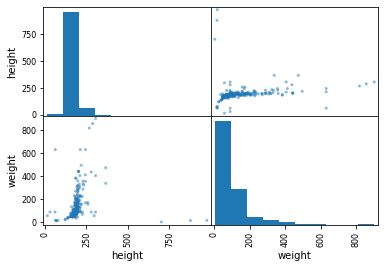

In [35]:
pd.plotting.scatter_matrix(height_df);

Hmmm. 
Lets check out the distribution with some stats and a histogram.

In [36]:
height_df[height_df['gender'] == 'Female']['height'].agg(['mean', 'median', 'std'])

mean      174.751748
median    170.000000
std        23.767127
Name: height, dtype: float64

In [37]:
height_df[height_df['gender'] == 'Male']['height'].agg(['mean', 'median', 'std'])

mean      192.274105
median    185.000000
std        67.878305
Name: height, dtype: float64

Ok. Looks like some reasonable values. Lets make a histogram and look for outliers. 

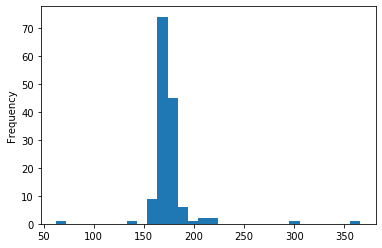

In [38]:
height_df[height_df['gender'] == 'Female']['height'].plot.hist(bins=30)

The graph is centrally distributed. The mean and median are pretty close as well. I think it would be safe to fill in the missing height values with the mean value.

### Fill in the missing height values with the mean heights for the gender

In [39]:
mean_female_height = height_df[height_df['gender'] == 'Female']['height'].mean()
heroes_df.loc[(heroes_df['gender'] == 'Female') & (heroes_df['height'] == -99.0), 'height'] = mean_female_height

In [40]:
heroes_df[(heroes_df['gender'] == 'Female') & (heroes_df['height'] == -99.0)]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight


In [41]:
mean_male_height = height_df[height_df['gender'] == 'Male']['height'].mean()
heroes_df.loc[(heroes_df['gender'] == 'Male') & (heroes_df['height'] == -99.0), 'height'] = mean_male_height

In [42]:
heroes_df[(heroes_df['gender'] == 'Male') & (heroes_df['height'] == -99.0)]

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight


Lets double check the height and weight for missing values again:

In [43]:
heroes_to_drop = heroes_df[(heroes_df['height'] == -99.0) | (heroes_df['weight'] == -99.0)]

In [44]:
heroes_to_drop.head()

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight


Excellent, all cleaned up! Now, lets go back and look for some more '-' values:

In [45]:
heroes_df.sample(5)

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
489,Nick Fury,Male,brown,Human,Brown / White,185.000000,Marvel Comics,-,good,99.0
403,Legion,Male,green / blue,Mutant,Black,175.000000,Marvel Comics,-,good,59.0
304,Guy Gardner,Male,blue,Human-Vuldarian,Red,188.000000,DC Comics,-,good,95.0
397,Kyle Rayner,Male,green,Human,Black,180.000000,DC Comics,-,good,79.0
275,Garbage Man,Male,-,Mutant,-,192.274105,DC Comics,-,good,90.0


In [46]:
powers_df.isna().sum().value_counts()

0    168
dtype: int64

There are no missing values from powers. 168 columns say no missing data (0)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [47]:
heroes_with_powers = heroes_df.set_index('name').join(powers_df.set_index('hero_names'))

In [48]:
heroes_with_powers.reset_index()

,index,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,192.274105,Marvel Comics,-,bad,90.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.000000,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,False
703,Ymir,Male,white,Frost Giant,No Hair,304.800000,Marvel Comics,white,good,90.0,...,False,False,False,False,False,False,False,False,False,False
704,Yoda,Male,brown,Yoda's species,White,66.000000,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,False
705,Zatanna,Female,blue,Human,Black,170.000000,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [55]:
female_heroes = heroes_with_powers.loc[heroes_with_powers['gender'] == 'Female', :]
female_heroes.head()

,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight,agility,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
Agent 13,Female,blue,-,Blond,173.000000,Marvel Comics,-,good,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angel Dust,Female,yellow,Mutant,Black,165.000000,Marvel Comics,-,good,57.0,True,...,False,False,False,False,False,False,False,False,False,False
Angel Salvadore,Female,brown,-,Black,163.000000,Marvel Comics,-,good,54.0,False,...,False,False,False,False,False,False,False,False,False,False
Angela,Female,-,-,-,174.751748,Image Comics,-,bad,58.0,False,...,False,False,False,False,False,False,False,False,False,False
Arachne,Female,blue,Human,Blond,175.000000,Marvel Comics,-,good,63.0,True,...,True,False,False,False,False,False,False,False,False,False


In [53]:
male_heroes = heroes_with_powers.loc[heroes_with_powers['gender'] == 'Male', :]
male_heroes.head()

,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight,agility,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,192.274105,Marvel Comics,-,bad,90.0,False,...,False,False,False,False,False,False,False,False,False,False


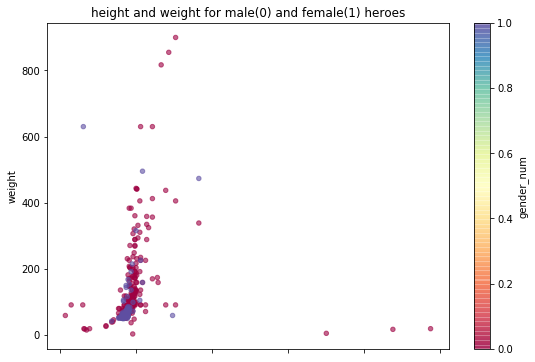

In [116]:
scatter_data = pd.concat([male_heroes, female_heroes])
scatter_data['gender_num'] = scatter_data['gender'].apply(lambda gender: 0 if gender == 'Male' else 1)
scatter_data.plot.scatter(x='height', y='weight', 
                          c='gender_num', colormap='Spectral', 
                          alpha=.6, figsize=(9, 6), 
                          title="height and weight for male(0) and female(1) heroes");

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [122]:
import seaborn as sns
sns.set(style="darkgrid")

In [148]:
def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name], axlabel=gender+' '+column_name)

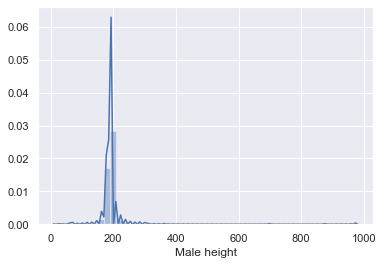

In [149]:
# Male Height
show_distplot(male_heroes, 'Male', 'height')

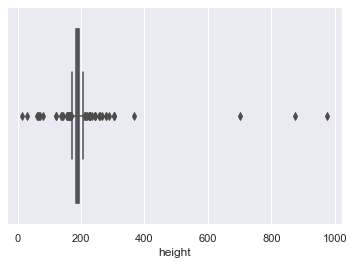

In [157]:
sns.boxplot(male_heroes['height'])

In [155]:
male_heroes['height'].describe()

count    511.000000
mean     192.274105
std       57.187378
min       15.200000
25%      183.000000
50%      191.000000
75%      192.274105
max      975.000000
Name: height, dtype: float64

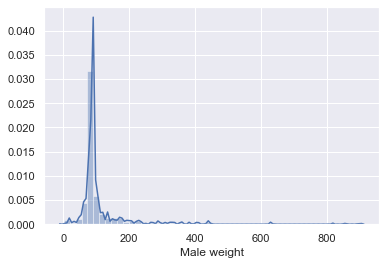

In [150]:
# Male Weight
show_distplot(male_heroes, 'Male', 'weight')

In [158]:
male_heroes['weight'].describe()

count    511.000000
mean     114.722114
std       93.278232
min        2.000000
25%       82.500000
50%       90.000000
75%      101.000000
max      900.000000
Name: weight, dtype: float64

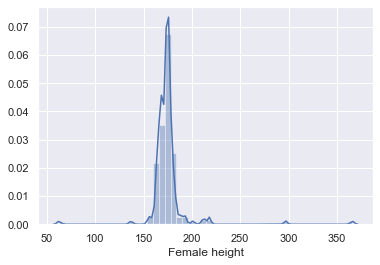

In [151]:
# Female Height
show_distplot(female_heroes, 'Female', 'height')

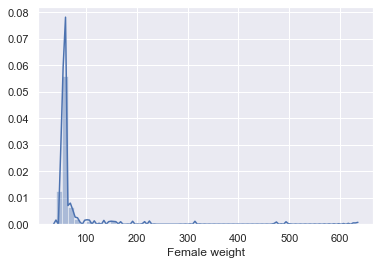

In [152]:
# Female Weight
show_distplot(female_heroes, 'Female', 'weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

I went through this process a bit earlier when we working with the missing values in the height and weight category, but I'll give it another shot here.

### Male height:
Male height is fairly centralized. There is a small amount of outliers to the right, skewing it just a little bit. Most of the heights are concentrated in a central area. The standard deviation is 57, which is just over half of the male weight standard deviation, which is 93.

### Male weight:
Male weight is definitely more skewed to the right. This is apparent from the histogram and the fact that the mean and median are so far from each other. The mean is 114 while the median is 90. This is a huge difference when compared the the height mean (192) and median (191).

These two differences are why I went with the mean for replacing missing values in height, and chose the median for the missing weight values.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [198]:
# reset index after joining on 'hero_name'
heroes_with_powers.reset_index(inplace=True)

In [422]:
# 5 most common powers overall
most_common_overall = heroes_with_powers.iloc[:, 11:].mean().sort_values(ascending=False).head()
most_common_overall

super strength    0.549451
stamina           0.437991
durability        0.394035
super speed       0.381476
flight            0.326531
dtype: float64

In [401]:
# 5 most common powers in the Marvel Universe
marvel_most_common = heroes_with_powers.loc[heroes_with_powers['publisher'] == 'Marvel Comics', 
                                            'accelerated healing':].mean().sort_values(ascending=False).head()
marvel_most_common

super strength    0.596439
durability        0.448071
stamina           0.436202
super speed       0.397626
flight            0.326409
dtype: float64

In [402]:
# 5 most common powers in the DC Universe
dc_most_common = heroes_with_powers.loc[heroes_with_powers['publisher'] == 'DC Comics', 
                                        'accelerated healing':].mean().sort_values(ascending=False).head()
dc_most_common

super strength    0.552632
stamina           0.452632
flight            0.442105
super speed       0.405263
durability        0.363158
dtype: float64

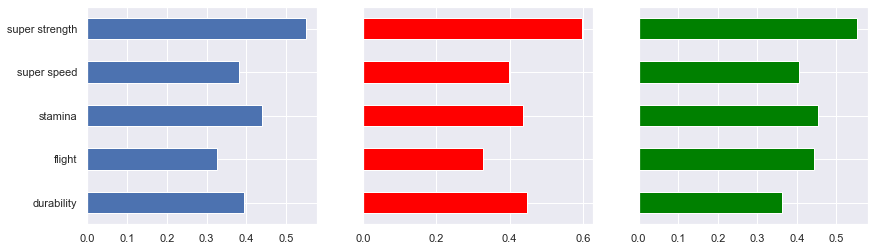

In [403]:
fig = plt.figure()
ax4 = fig.add_subplot(1, 3, 1)
ax5 = fig.add_subplot(1, 3, 2, sharey=ax4)
ax6 = fig.add_subplot(1, 3, (3), sharey=ax4)

index_order = list(most_common_overall.index)

most_common_overall.sort_index(axis='index').plot.barh(label="Overall", legend=True, ax=ax1);
marvel_most_common.sort_index(axis='index').plot.barh(label = "Marvel", color="red", legend=True, ax=ax1);
dc_most_common.sort_index(axis='index').plot.barh(label="DC", color="green", legend=True, ax=ax1);
most_common_overall.sort_index(axis='index').plot.barh(label="Overall", figsize=(14, 4), ax=ax4);
marvel_most_common.sort_index(axis='index').plot.barh(label = "Marvel", color="red", ax=ax5);
dc_most_common.sort_index(axis='index').plot.barh(label="DC", color="green", ax=ax6);

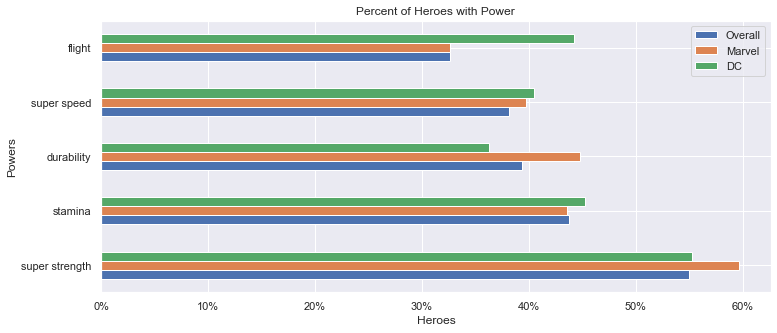

In [419]:
new_df = pd.DataFrame({ 'Overall': most_common_overall, 'Marvel': marvel_most_common, 'DC': dc_most_common}, 
                      index=index_order)
ax = new_df.plot.barh(title="Percent of Heroes with Power", figsize=(12, 5));
ax.set_ylabel("Powers");
ax.set_xlabel("Heroes");

def dec_to_percent(number):
    return number * 100

# manipulate
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals]);


In [421]:
new_df.head()

,Overall,Marvel,DC
super strength,0.549451,0.596439,0.552632
stamina,0.437991,0.436202,0.452632
durability,0.394035,0.448071,0.363158
super speed,0.381476,0.397626,0.405263
flight,0.326531,0.326409,0.442105


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

### My findings

The top 5 superpowers for each publisher set were very similar. They were each a combination of the same 5 abilities: durability, super speed, flight, and superstrength.

At first I compared them by count, but realized that would be biased because the bigger dataset would always look most like it had the most popular powers. I changed to graphing the mean, since it makes more sense to compare the percentage of heroes who possess each power. It also makes it possible to compare the Marvel and DC dataframes to the baseline (original).


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data